# Conclusions

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
lc_data = pd.read_csv("../data/loan_clean.csv")
lc_data.drop('Unnamed: 0', inplace=True, axis=1)

In [3]:
lc_data

,Unnamed: 0.1,loan_amnt,int_rate,annual_inc,loan_status,dti,delinq_2yrs,fico_range_low,inq_last_6mths,open_acc,...,tax_liens,total_bal_ex_mort,home_ownership_MORTGAGE,home_ownership_OWN,verification_status_Source Verified,verification_status_Verified,pymnt_plan_y,initial_list_status_w,application_type_Joint App,debt_settlement_flag_Y
0,8,11575.0,0.0735,153000.0,1.0,16.99,0.0,720.0,0.0,20.0,...,0.0,100865.0,0,1,0,0,0,1,0,0
1,10,7200.0,0.2485,50000.0,1.0,6.07,0.0,685.0,0.0,4.0,...,0.0,5588.0,0,0,1,0,0,1,0,0
2,24,7500.0,0.0735,110000.0,1.0,13.12,0.0,710.0,2.0,19.0,...,0.0,45955.0,1,0,0,0,0,1,0,0
3,42,10000.0,0.1602,51979.0,1.0,10.11,0.0,690.0,0.0,15.0,...,0.0,10956.0,0,0,1,0,0,1,0,0
4,91,14000.0,0.1602,75000.0,1.0,10.86,1.0,685.0,0.0,4.0,...,0.0,27684.0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406070,421088,11575.0,0.1559,25400.0,1.0,27.08,0.0,680.0,0.0,9.0,...,0.0,19798.0,0,0,0,1,0,0,0,0
406071,421089,12000.0,0.1199,63000.0,0.0,23.69,1.0,685.0,0.0,13.0,...,0.0,112990.0,1,0,0,1,0,0,0,0
406072,421092,13000.0,0.1599,35000.0,0.0,30.90,0.0,680.0,0.0,9.0,...,0.0,34178.0,0,0,0,1,0,1,0,0
406073,421093,12000.0,0.1999,64400.0,0.0,27.19,1.0,695.0,2.0,17.0,...,0.0,58418.0,0,0,1,0,0,1,0,0


In [19]:
y = lc_data['loan_status']
X = lc_data.drop('loan_status', axis=1)

In [20]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [21]:
import pickle
load_lr = pickle.load(open("../models/logisticRegr.sav", 'rb'))
load_svm = pickle.load(open("../models/svm_model.sav", 'rb'))
load_rf = pickle.load(open("../models/rf_model.sav", 'rb'))
load_xgboostt = pickle.load(open("../models/xgb_model.sav", 'rb'))

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics

## Results

Here we present the results for each model

### Logistic Regression

In [8]:
y_pred = load_lr.predict(x_test)

Accuracy train:  0.8681982952232102
Accuracy test: 0.8681921610732967


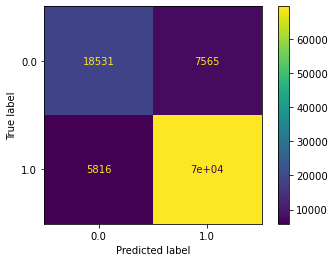

In [11]:
plot_confusion_matrix(load_lr, x_test, y_test)
print("Accuracy train: ", metrics.accuracy_score(y_train, load_lr.predict(x_train)))
print("Accuracy test:",metrics.accuracy_score(y_test, y_pred))

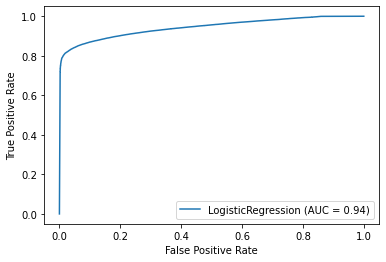

In [12]:
metrics.plot_roc_curve(load_lr, x_test, y_test)
plt.show() 

### Support Vector Machine

In [13]:
y_pred = load_svm.predict(x_test)

Accuracy train:  0.8302611014066379
Accuracy test: 0.8307508939213349


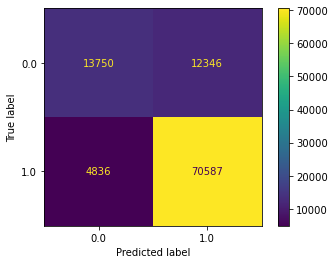

In [14]:
plot_confusion_matrix(load_svm, x_test, y_test)
print("Accuracy train: ", metrics.accuracy_score(y_train, load_svm.predict(x_train)))
print("Accuracy test:",metrics.accuracy_score(y_test, y_pred))

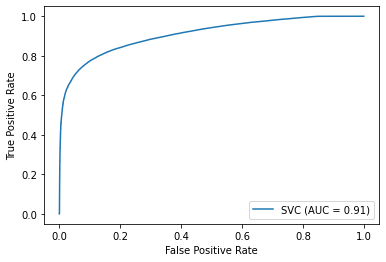

In [15]:
metrics.plot_roc_curve(load_svm, x_test, y_test)
plt.show() 

### Random Forest

In [23]:
y_pred = load_rf.predict(x_test)

Accuracy train:  0.961819829522321
Accuracy test: 0.9612387828879323


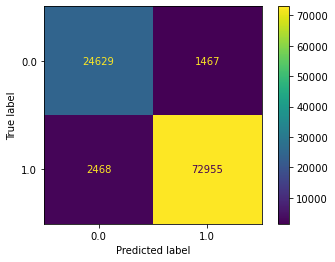

In [24]:
plot_confusion_matrix(load_rf, x_test, y_test)
print("Accuracy train: ", metrics.accuracy_score(y_train, load_rf.predict(x_train)))
print("Accuracy test:",metrics.accuracy_score(y_test, y_pred))

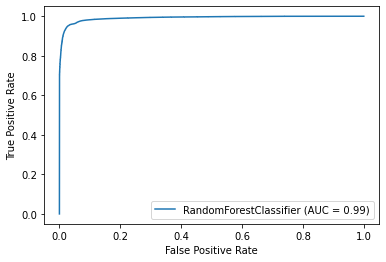

In [25]:
metrics.plot_roc_curve(load_rf, x_test, y_test)
plt.show() 

### XGBoost

In [26]:
y_pred = load_xgboostt.predict(x_test)

Accuracy train:  0.9941324419811135
Accuracy test: 0.9842098523429111


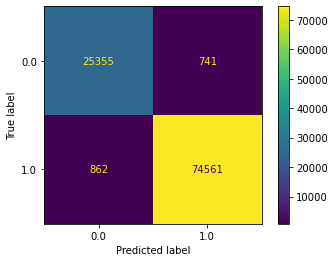

In [27]:
plot_confusion_matrix(load_xgboostt, x_test, y_test)
print("Accuracy train: ", metrics.accuracy_score(y_train, load_xgboostt.predict(x_train)))
print("Accuracy test:",metrics.accuracy_score(y_test, y_pred))

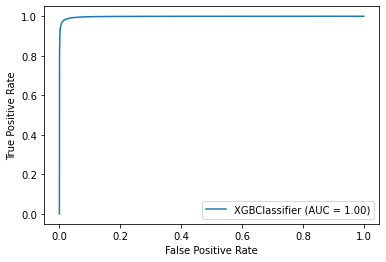

In [28]:
metrics.plot_roc_curve(load_xgboostt, x_test, y_test)
plt.show() 

# Conclusions

When considering which model would fit better with this classification problem, we would definetly have to choose between either Random Forest or XGBoost, both over a 96% of accuracy, which is quite high. 

There where also very good outcomes when predicting with the other two models, placing correctly  over 83% of the loans. However, the Logistic Regression was way better for different reasons:

1. There was an obvious accuracy advantage (87% for LR, 83% for SVM)


2. The Support Vector Machine model clearly misplaced a high volume of default loans (47%) which, even though it compensates with a very low error classifying the fully paid ones (3%), is very dangerous if we take into account that in the banking industry is way more severe to concede a future default loan than not condecing a loan that will probably be paid.

For that reason, this would be our order of preference when choosing a model:

1. XGBoost (98% accuracy in test set, AUC = 1.00)
2. Random Forest (91% accuracy in test set)
3. Logistic Regression
4. Support Vector Machine

# References

Scikit-Learn: Hands-on machine learning with Scikit-Learn and TensorFlow / Aurélien Géron (2017) 

https://seaborn.pydata.org/tutorial/distributions.html

https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e

https://seaborn.pydata.org/index.html

https://towardsdatascience.com/exploratory-data-analysis-eda-python-87178e35b14

SearchGridCV: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

Logistic Regression: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

SVM: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

Random Forest: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

XGBoost: https://www.kaggle.com/stuarthallows/using-xgboost-with-scikit-learn